# Data Science Intern- Lets Grow More
### Author : Pavan Wanjari

## Task 1
### Iris Flowers Classification ML Project :

The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

### Data Set Information:

* This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

* Predicted attribute: class of iris plant.

* This is an exceedingly simple domain.

* This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


### Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:-
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica
    
### Dataset link :- (http://archive.ics.uci.edu/ml/datasets/Iris)

<img src = "iris1.png" style = "width:300px;height:200px"/>

## Import Libraries

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

## Import dataset

In [4]:
col= ["sepal length", "sepal width", "petal length", "petal width", "class"]
iris_df = pd.read_csv("iris.data", names= col)

In [5]:
iris_df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Exploration

In [6]:
# Check shape of data
iris_df.shape

(150, 5)

In [7]:
# check basic information of data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# check statistical summary of data
iris_df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Check null values 
iris_df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

* No Null values present in dataset

In [10]:
print("Unique number of values in dataset class: ", iris_df["class"].nunique())
print("Unique Class in iris datset: ", iris_df["class"].unique())

Unique number of values in dataset class:  3
Unique Class in iris datset:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


* There are 3 class in iris dataset that is **'Iris-setosa', 'Iris-versicolor' & 'Iris-virginica'**

# Exploratory data analysis (EDA)

### Data visualization

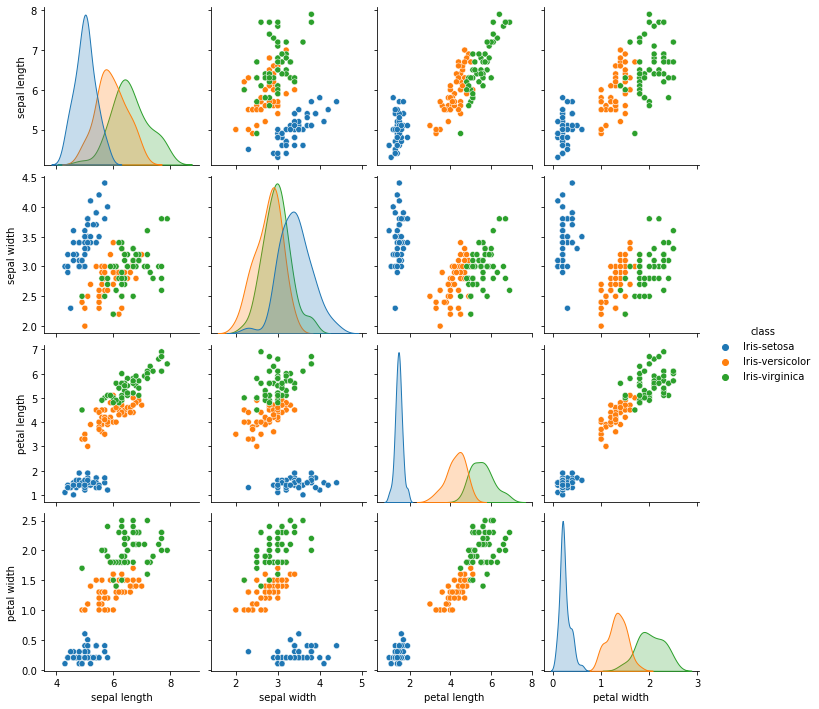

In [11]:
# use pairplot
sns.pairplot(iris_df, hue= "class")
plt.show()

In [12]:
# Check correlations in dataset

iris_df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


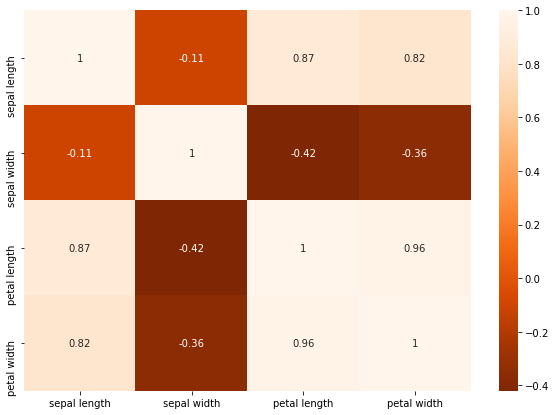

In [13]:
# use heatmap to see correlation
plt.figure(figsize=(10, 7))
sns.heatmap(iris_df.corr(), annot= True, cmap= "Oranges_r")
plt.show()

* In above heatmap we see petal length and petal width  is highly correlated with each other
* petal length and petal width is negatively correlated with sepal width

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64


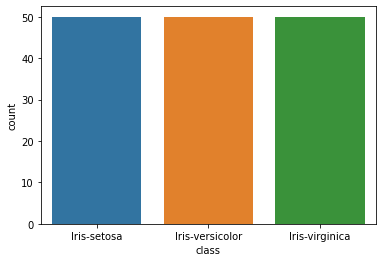

In [14]:
# check value counts in class 
print(iris_df["class"].value_counts())

# use countplot 
sns.countplot(iris_df["class"])
plt.show()


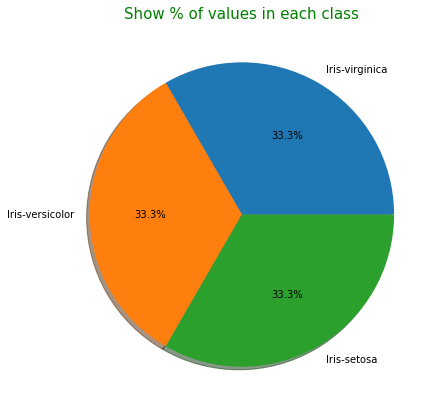

In [15]:
iris_df["class"].value_counts().plot(kind="pie", autopct = '%1.1f%%', shadow=True, figsize=(7,7))

plt.title("Show % of values in each class", fontsize= 15, c= "g")
plt.ylabel(" ", fontsize= 10, c= "r")
plt.show()

We can see here all class has equal values in dataset.
* Iris-setosa    :-     50
* Iris-versicolor :-    50
* Iris-virginica   :-   50

In [16]:
temp_data = pd.DataFrame(iris_df)
mean_data = temp_data.groupby("class").mean()
print(mean_data)

                 sepal length  sepal width  petal length  petal width
class                                                                
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


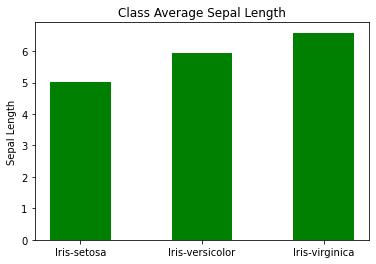

In [17]:
plt.bar(mean_data.index, mean_data["sepal length"], color ='green', width = 0.5)
 

plt.ylabel("Sepal Length")
plt.title("Class Average Sepal Length")
plt.show()

**Scatterplot for sepal length and sepal width**

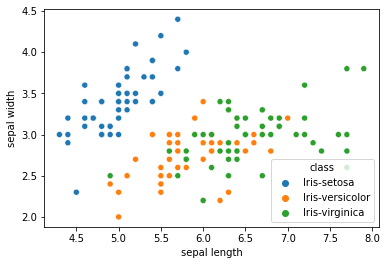

In [18]:
sns.scatterplot(iris_df["sepal length"], iris_df["sepal width"], hue= iris_df["class"])

plt.show()

**scatterplot for petal length and petal width**

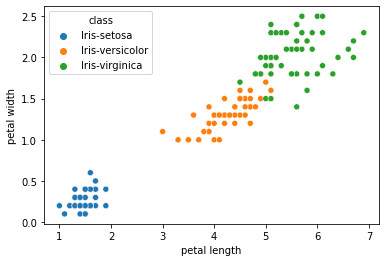

In [19]:
sns.scatterplot(iris_df["petal length"], iris_df["petal width"], hue= iris_df["class"])
plt.show()

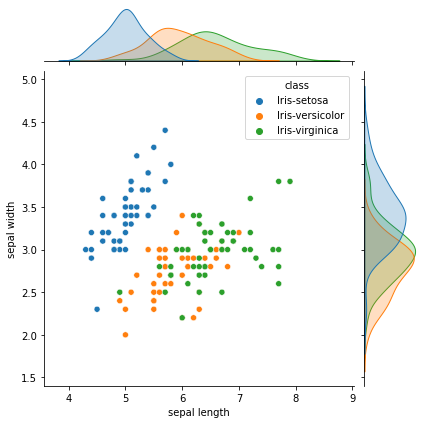

In [20]:
sns.jointplot(data = iris_df, x= "sepal length", y = "sepal width" , size = 6, hue = "class")
plt.show()

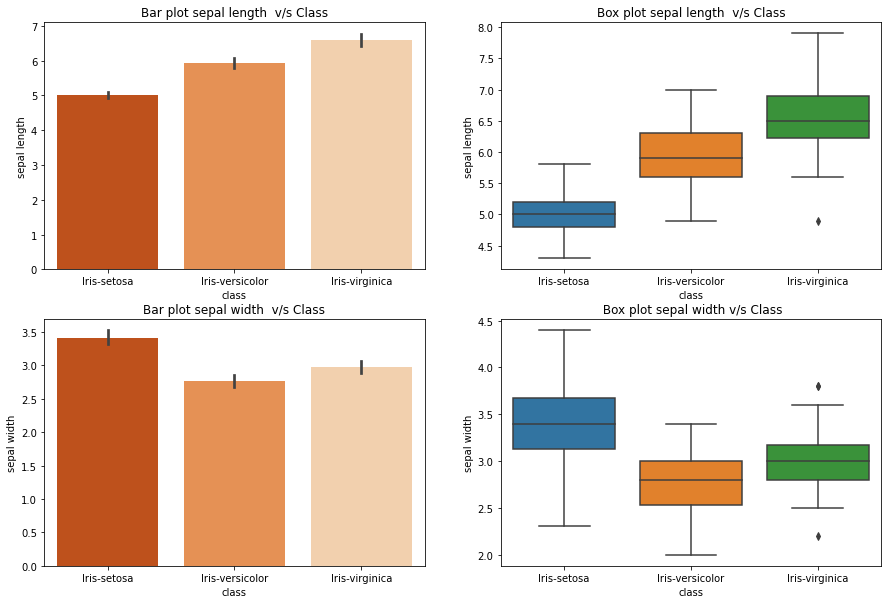

In [21]:
plt.figure(figsize= (15,10))
plt.subplot(2,2,1)
sns.barplot(x= "class", y = "sepal length", data = iris_df, palette= "Oranges_r")
plt.title("Bar plot sepal length  v/s Class")

plt.subplot(2,2,2)
sns.boxplot(x= "class", y = "sepal length", data= iris_df)
plt.title("Box plot sepal length  v/s Class")

plt.subplot(2,2,3)
sns.barplot(x= "class", y = "sepal width", data = iris_df, palette= "Oranges_r")
plt.title("Bar plot sepal width  v/s Class")

plt.subplot(2,2,4)
sns.boxplot(x= "class", y = "sepal width", data= iris_df)
plt.title(" Box plot sepal width v/s Class") 

plt.show()

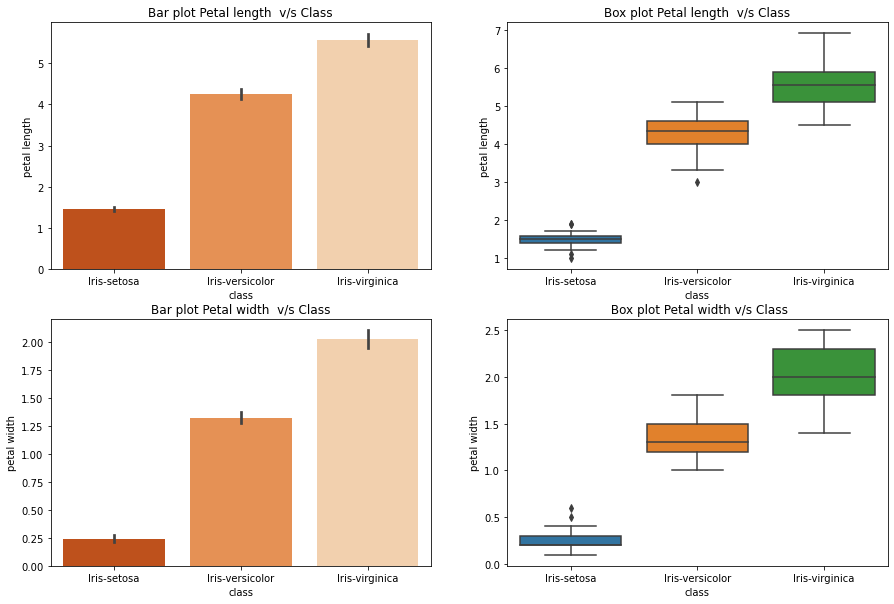

In [22]:
plt.figure(figsize= (15,10))

plt.subplot(2,2,1)
sns.barplot(x= "class", y = "petal length", data = iris_df, palette= "Oranges_r")
plt.title("Bar plot Petal length  v/s Class") 

plt.subplot(2,2,2)
sns.boxplot(x= "class", y = "petal length", data= iris_df)
plt.title("Box plot Petal length  v/s Class") 

plt.subplot(2,2,3)
sns.barplot(x= "class", y = "petal width", data = iris_df, palette= "Oranges_r")
plt.title("Bar plot Petal width  v/s Class") 

plt.subplot(2,2,4)
sns.boxplot(x= "class", y = "petal width", data= iris_df)
plt.title(" Box plot Petal width v/s Class") 
plt.show()

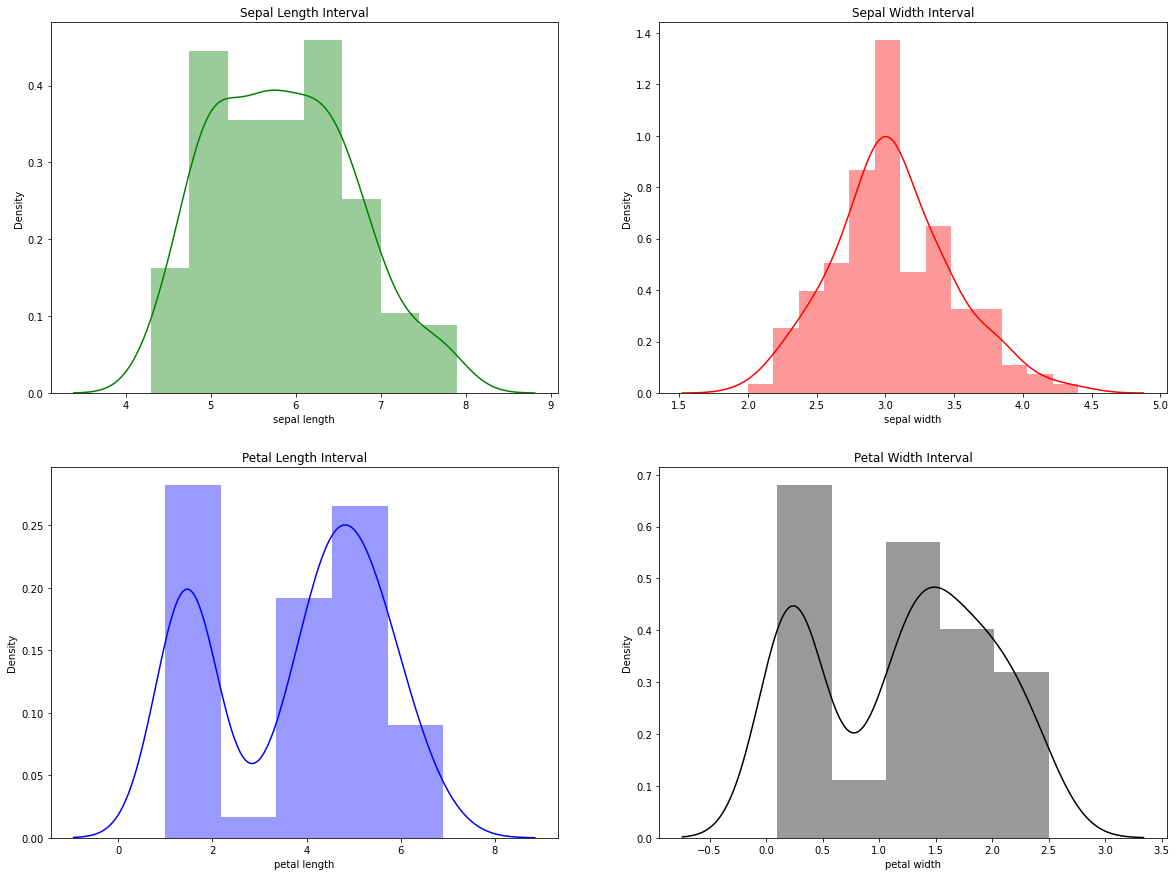

In [23]:
plt.figure(figsize=(20, 15))
plt.subplot(2,2,1)
sns.distplot(iris_df["sepal length"], color="g").set_title("Sepal Length Interval")

plt.subplot(2,2,2)
sns.distplot(iris_df["sepal width"], color="r").set_title("Sepal Width Interval")

plt.subplot(2,2,3)
sns.distplot(iris_df["petal length"], color="b").set_title("Petal Length Interval")

plt.subplot(2,2,4)
sns.distplot(iris_df["petal width"], color="black").set_title("Petal Width Interval")

plt.show()

### Data Cleaning

In [24]:
#Change Categorical Data into numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

iris_df['class'] = le.fit_transform(iris_df['class'])
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
iris_df["class"].unique()

array([0, 1, 2])

In [26]:
X= iris_df.iloc[:, [0,1,2,3]]
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
y = iris_df.iloc[:, -1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

In [28]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


# Model building

## Supervised Machine Learning

In [40]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(120, 4)
(30, 4)
(120,)
(120,)


### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

lr.fit(X_train, y_train)
print("Logistic regression successfully implemented")

y_pred =  lr.predict(X_test)

# confussion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix:- ")
print(cm)

accuracy = accuracy_score(y_test,y_pred)

print("accuracy is:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Logistic regression successfully implemented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is:-  100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)
print("Decision Tree Algorithm is successfully implimented.")

y_pred = dtree.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Decision Tree Algorithm is successfully implimented.
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy:-  100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
print("Rndom Forest Classifier successfully Implimented")

y_pred = rfc.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Rndom Forest Classifier successfully Implimented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy:-  100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Support Vector Machine

In [35]:
from sklearn.svm import SVC
svc= SVC()

svc.fit(X_train, y_train)
print("Support vactor classifier is successfully implemented")

y_pred = svc.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))


Support vactor classifier is successfully implemented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy:-  100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### K Nearest Neighbors Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)

print("K-Nearest Neighbors classifier is successfully implemented")

y_pred = knn.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))


K-Nearest Neighbors classifier is successfully implemented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy:-  100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Ada Boost Classifier

In [38]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)

print("Ada Boost Classifier is successfully implemented")

y_pred = adb.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))


Ada Boost Classifier is successfully implemented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy:-  96.66666666666667
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



### Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Naive Bayes is successfully implemented")

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:- ")
print(cm)

# Accuracy test
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))


Naive Bayes is successfully implemented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  1]
 [ 0  0  5]]
accuracy:-  96.66666666666667
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



## Result:-  
1. Accuracy of Logistic Regression :- 100 %
2. Accuracy of Decision Tree       :- 100 %
3. Accuracy of Random Forest Classifier :- 100 %
4. Accuracy of Support Vecor Machine :- 100 %
5. Accuracy of K Nearest Neighbors Classifier :- 100% 
6. Accuracy of Ada Boost Classifier :- 96.66 %
7. Accuracy of Naive Bayes :- 96.66 %

## Model Created Successfully !

# Thank you!